In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)


In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

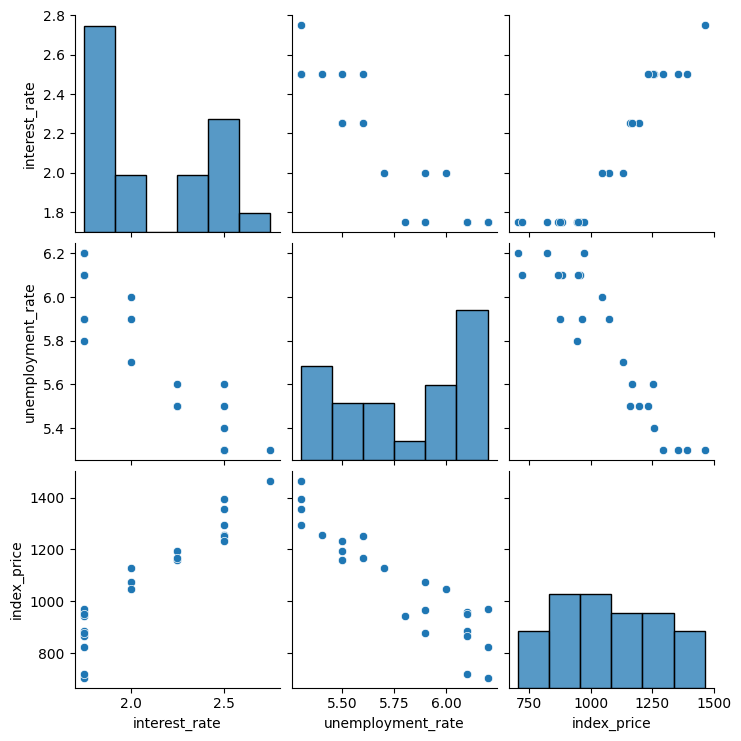

In [7]:
import seaborn as sns

sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


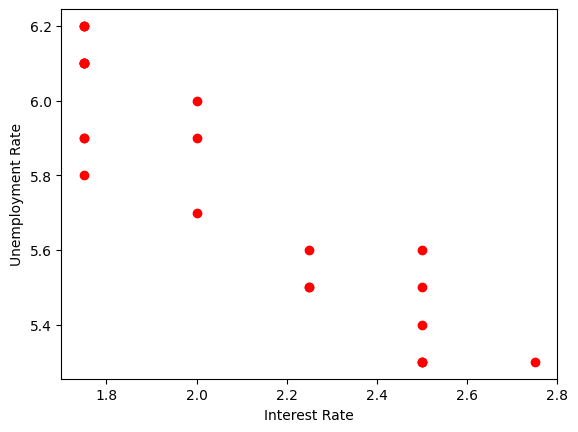

In [10]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [11]:
X, y = df_index.iloc[:, :-1], df_index.iloc[:, -1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

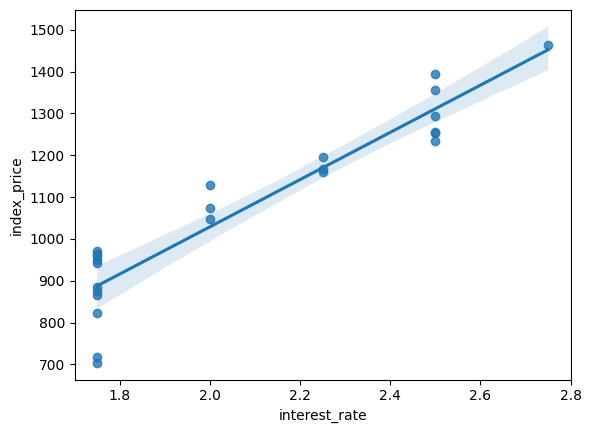

In [16]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

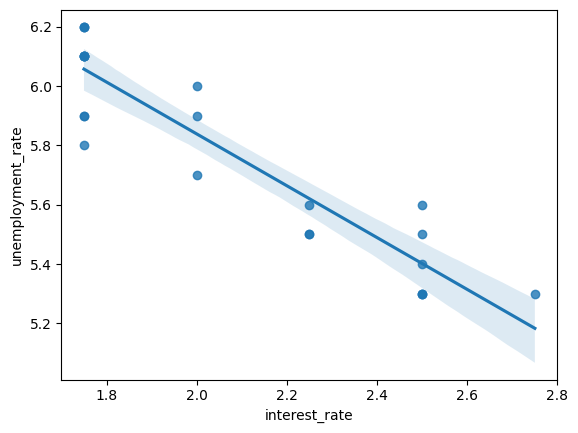

In [17]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

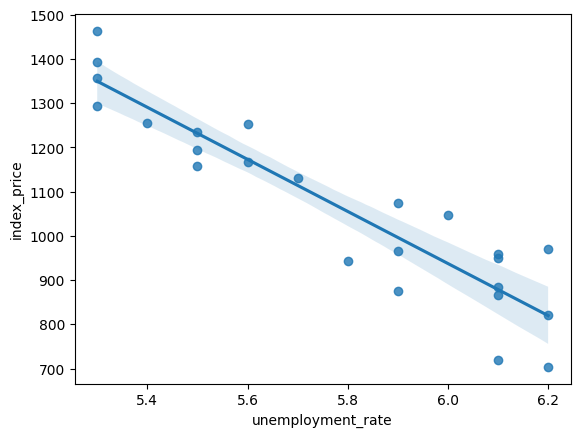

In [18]:
sns.regplot(x=df_index['unemployment_rate'], y=df_index['index_price'])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [23]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, 
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [26]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [27]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [28]:
y_pred = regression.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [30]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8278978091457145


In [31]:
adj_r2 = 1 - (1- r2)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(adj_r2)

0.7131630152428576


## Assumptions

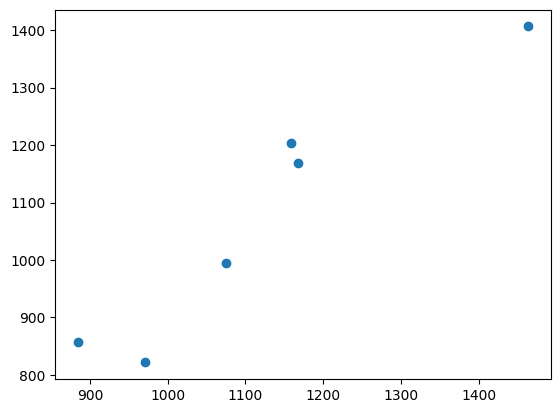

In [32]:
plt.scatter(y_test, y_pred)

In [33]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


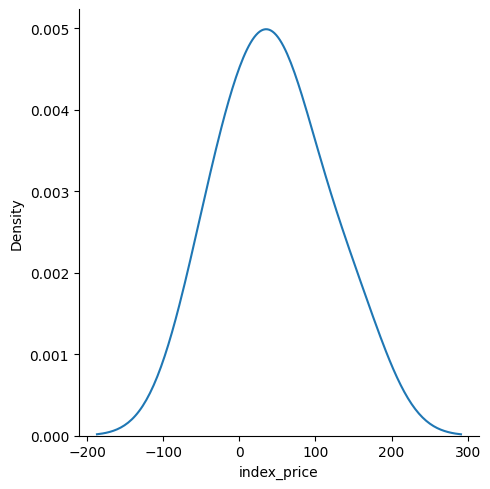

In [34]:
sns.displot(residuals, kind='kde')

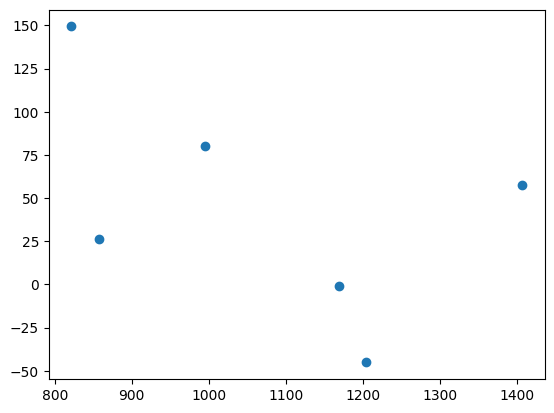

In [35]:
plt.scatter(y_pred, residuals)
plt.show()

In [36]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                       0.754
Time:                        03:31:39   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
regression.coef_

array([  88.27275507, -116.25716066])

In [39]:
regression.intercept_

np.float64(1053.4444444444443)